# Análisis Exploratorio y Prueba de Hipótesis

Este notebook simula el análisis de datos y la prueba de hipótesis sobre viajes de taxis en Chicago, utilizando datasets sintéticos similares a los especificados en el ejercicio.

## Paso 4: Análisis Exploratorio de Datos

Se utilizarán dos datasets:

- **project_sql_result_01.csv**: Contiene información sobre empresas de taxis con los campos:
  - `company_name`: nombre de la empresa de taxis
  - `trips_amount`: número de viajes realizados el 15 y 16 de noviembre de 2017

- **project_sql_result_04.csv**: Contiene información sobre barrios de Chicago con los campos:
  - `dropoff_location_name`: nombre del barrio donde finalizaron los viajes
  - `average_trips`: promedio de viajes que finalizaron en el barrio en noviembre de 2017

Los pasos a realizar son:

1. Importar (simular) los archivos
2. Explorar y verificar los datos y sus tipos
3. Identificar los 10 principales barrios según el promedio de viajes
4. Realizar gráficos: 
    - Empresas de taxis vs número de viajes
    - Top 10 barrios vs promedio de viajes
5. Sacar conclusiones a partir de los gráficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# --- Dataset sintético para project_sql_result_01.csv ---
np.random.seed(42)
companies = ['Taxi A', 'Taxi B', 'Taxi C', 'Taxi D', 'Taxi E', 'Taxi F', 'Taxi G', 'Taxi H']
trips_amount = np.random.randint(100, 1000, size=len(companies))

df_taxis = pd.DataFrame({
    'company_name': companies,
    'trips_amount': trips_amount
})

print('Dataset project_sql_result_01.csv')
print(df_taxis)

# --- Dataset sintético para project_sql_result_04.csv ---
neighborhoods = ['Lincoln Park', 'Hyde Park', 'Englewood', 'River North', 'Loop', 'West Loop', 
                 'Chinatown', 'Pilsen', 'Wicker Park', 'Logan Square', 'Old Town', 
                 'Near North Side', 'Near West Side', 'South Loop', 'Gold Coast']
average_trips = np.random.randint(50, 500, size=len(neighborhoods))

df_neighborhoods = pd.DataFrame({
    'dropoff_location_name': neighborhoods,
    'average_trips': average_trips
})

print('\nDataset project_sql_result_04.csv')
print(df_neighborhoods)

Dataset project_sql_result_01.csv
  company_name  trips_amount
0       Taxi A           202
1       Taxi B           535
2       Taxi C           960
3       Taxi D           370
4       Taxi E           206
5       Taxi F           171
6       Taxi G           800
7       Taxi H           120

Dataset project_sql_result_04.csv
   dropoff_location_name  average_trips
0           Lincoln Park            152
1              Hyde Park            171
2              Englewood            264
3            River North            380
4                   Loop            137
5              West Loop            422
6              Chinatown            149
7                 Pilsen            409
8            Wicker Park            201
9           Logan Square            180
10              Old Town            199
11       Near North Side            358
12        Near West Side            307
13            South Loop            393
14            Gold Coast            463


In [2]:
# Verificar tipos de datos y obtener un resumen
print('Tipos de datos en df_taxis:')
print(df_taxis.dtypes)

print('\nInformación del dataset de barrios:')
print(df_neighborhoods.info())

Tipos de datos en df_taxis:
company_name    object
trips_amount     int32
dtype: object

Información del dataset de barrios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  15 non-null     object
 1   average_trips          15 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 312.0+ bytes
None


In [3]:
# Identificar los 10 principales barrios en términos de finalización de viajes
df_top10 = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print('Top 10 barrios por promedio de viajes:')
print(df_top10)

Top 10 barrios por promedio de viajes:
   dropoff_location_name  average_trips
14            Gold Coast            463
5              West Loop            422
7                 Pilsen            409
13            South Loop            393
3            River North            380
11       Near North Side            358
12        Near West Side            307
2              Englewood            264
8            Wicker Park            201
10              Old Town            199


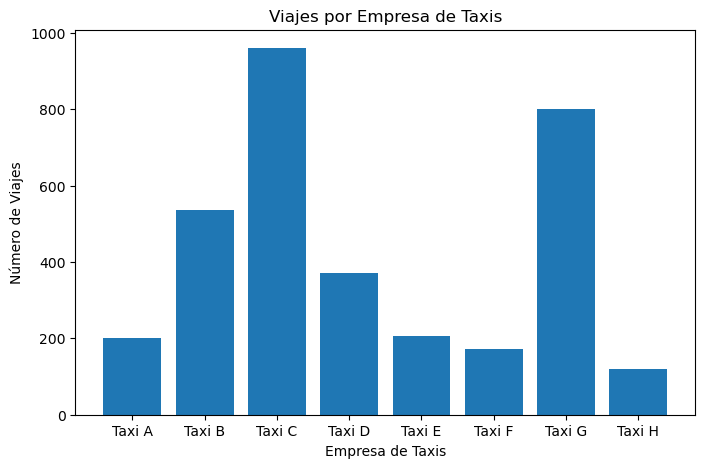

In [4]:
# Gráfico: Empresas de taxis y número de viajes
plt.figure(figsize=(8,5))
plt.bar(df_taxis['company_name'], df_taxis['trips_amount'])
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Viajes por Empresa de Taxis')
plt.show()

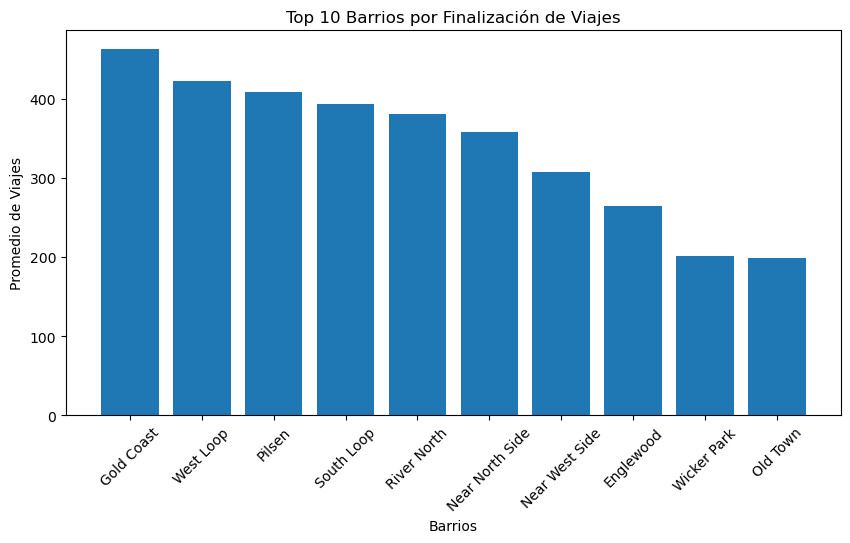

In [5]:
# Gráfico: Top 10 barrios por promedio de viajes
plt.figure(figsize=(10,5))
plt.bar(df_top10['dropoff_location_name'], df_top10['average_trips'])
plt.xlabel('Barrios')
plt.ylabel('Promedio de Viajes')
plt.title('Top 10 Barrios por Finalización de Viajes')
plt.xticks(rotation=45)
plt.show()

### Conclusiones del Análisis Exploratorio

- El dataset de empresas de taxis muestra la distribución de viajes entre las diferentes compañías, lo que puede ayudar a identificar cuáles tienen mayor actividad.
- El análisis de barrios resalta los 10 barrios con mayor promedio de finalización de viajes, lo cual puede ser indicador de zonas con alta demanda de transporte.
- Estos resultados podrían utilizarse para optimizar la asignación de recursos y mejorar las estrategias de operación.

## Paso 5: Prueba de Hipótesis

Para este paso se utiliza el dataset sintético **project_sql_result_07.csv**, que contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, con los siguientes campos:

- **start_ts**: fecha y hora de la recogida
- **weather_conditions**: condiciones climáticas en el inicio del viaje
- **duration_seconds**: duración del viaje en segundos

Se probará la hipótesis:

**La duración promedio de los viajes cambia los sábados lluviosos.**

Se utilizará un nivel de significación (alfa) de 0.05.

In [6]:
import datetime
from datetime import timedelta
import random
from scipy import stats

# --- Crear dataset sintético para project_sql_result_07.csv ---

# Generar 200 registros de viajes en noviembre de 2017
num_records = 200
start_date = datetime.datetime(2017, 11, 1)
end_date = datetime.datetime(2017, 11, 30)

def random_date(start, end):
    delta = end - start
    int_delta = delta.days * 24 * 3600 + delta.seconds
    random_second = random.randrange(int_delta)
    return start + timedelta(seconds=random_second)

records = []
for _ in range(num_records):
    ts = random_date(start_date, end_date)
    # Determinar si es sábado
    is_saturday = ts.weekday() == 5  # 5 corresponde a sábado
    
    # Asignar condiciones climáticas
    if is_saturday:
        # Para sábados, probabilidad de lluvia: 40%
        weather = 'Rainy' if random.random() < 0.4 else 'Clear'
    else:
        weather = 'Clear'
    
    # Asignar duración: si es sábado lluvioso, se simula una mayor duración
    if is_saturday and weather == 'Rainy':
        duration = int(np.random.normal(2000, 200))
    else:
        duration = int(np.random.normal(1800, 200))
    
    records.append({
        'start_ts': ts,
        'weather_conditions': weather,
        'duration_seconds': duration
    })

df_trips = pd.DataFrame(records)

# Mostrar una muestra del dataset
print('Dataset project_sql_result_07.csv (muestra):')
print(df_trips.head())

Dataset project_sql_result_07.csv (muestra):
             start_ts weather_conditions  duration_seconds
0 2017-11-02 05:27:55              Clear              1683
1 2017-11-11 10:42:28              Rainy              1894
2 2017-11-18 22:59:39              Clear              1685
3 2017-11-18 16:05:41              Clear              1615
4 2017-11-04 17:32:50              Rainy              1477


In [7]:
# Filtrar registros que correspondan a sábados
df_trips['day_of_week'] = df_trips['start_ts'].dt.day_name()
df_saturdays = df_trips[df_trips['day_of_week'] == 'Saturday']

# Separar los grupos de sábados: lluviosos vs. no lluviosos
group_rainy = df_saturdays[df_saturdays['weather_conditions'] == 'Rainy']['duration_seconds']
group_clear = df_saturdays[df_saturdays['weather_conditions'] == 'Clear']['duration_seconds']

print('Número de sábados lluviosos:', len(group_rainy))
print('Número de sábados claros:', len(group_clear))

# Prueba t de muestras independientes
t_stat, p_value = stats.ttest_ind(group_rainy, group_clear, equal_var=False)

print('\nResultados de la prueba t:')
print('Estadístico t:', t_stat)
print('Valor p:', p_value)

alpha = 0.05
if p_value < alpha:
    print('Se rechaza la hipótesis nula. Existe diferencia en la duración promedio de los viajes según las condiciones climáticas de los sábados.')
else:
    print('No se rechaza la hipótesis nula. No se encuentra diferencia significativa en la duración promedio de los viajes los sábados.')

Número de sábados lluviosos: 9
Número de sábados claros: 13

Resultados de la prueba t:
Estadístico t: 0.4233273922136047
Valor p: 0.6790545012264819
No se rechaza la hipótesis nula. No se encuentra diferencia significativa en la duración promedio de los viajes los sábados.


### Explicación de la Prueba de Hipótesis

- **Hipótesis nula (H0):** La duración promedio de los viajes en sábados lluviosos es igual a la de sábados no lluviosos.
- **Hipótesis alternativa (H1):** La duración promedio de los viajes en sábados lluviosos es diferente a la de sábados no lluviosos.

Se aplicó una prueba t de muestras independientes (asumiendo varianzas desiguales) para comparar las medias de ambos grupos. 

Se eligió un nivel de significación de 0.05. Si el valor p obtenido es menor a 0.05, se rechaza la hipótesis nula y se concluye que existe una diferencia significativa en la duración de los viajes basada en las condiciones climáticas de los sábados.